# Práctico

Integrantes:
* Clara Quintana
* Ezequiel Juarez
* David Veisaga
* Jorge Pérez 

In [29]:
import sys
import os
import nltk
import numpy
import matplotlib.pyplot as plt
import pandas
import seaborn
import collections


In [ ]:
!pip install -U spacy
!pip install -U spacy-lookups-data
!python -m spacy download es_core_news_sm

     |████████████████████████████████| 10.0MB 488kB/s 
     |████████████████████████████████| 2.1MB 31.0MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 93.8MB 71kB/s 
  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.3.2-py2.py3-none-any.whl size=93807572 sha256=419e1025cf8c05c9fe3a9aa8642802412cf7d2dfa114f6057c31dce02f9a0c48
  Stored in directory: /root/.cache/pip/wheels/5b/f4/d0/bf720a06127c95d9be2a81d197a3f1998ee5fc63410944e28f
Successfully built spacy-lookups-data
     |████████████████████████████████| 16.2MB 2.5MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.3.1-cp36-none-any.whl size=16217001 sha256=892b3ee5be02f6424050b6a4d2dd58ab46541e96b202bd2a0274671a48a26bd0
  Stored in directory: /tmp/pip-ephem-wheel-cac

In [30]:
# Se verfica entorno de ejecución
in_colab = "google.colab" in sys.modules

if in_colab:
    from google.colab import drive

    drive.mount("/content/drive")
    BASE_DIR = "/content/drive/My Drive/Diplo2020 Mentoria/"
else:
    BASE_DIR = "../"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
train_data_dir = BASE_DIR + "Datos/"
train_data = BASE_DIR + "Corpus.cor"
lista_documentos = BASE_DIR + "Documentos.csv"

## Defino función para leer PDF y TXT

In [ ]:
!pip install pdfminer
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

In [ ]:
def pdf_to_text(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    layout = LAParams() 
    device = TextConverter(rsrcmgr, retstr, laparams=layout)    
    filepath = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ''
    maxpages = 0
    caching = True
    pagenos=set()
    
    for page in PDFPage.get_pages(filepath, pagenos, maxpages=maxpages, password=password, caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    filepath.close()
    device.close()
    retstr.close()
    return text

In [ ]:
def txt_to_text(path):
    filepath = open(path, encoding='utf-8')
    text = filepath.read()
    filepath.close()
    return text

## Generacion del Corpus

Defino una función que retorne una lista de todos los archivos a importar al corpus

In [ ]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = dirName + '/' + entry
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

Genero una lista con los archivos a importar

In [ ]:
listOfFile = getListOfFiles(train_data_dir)
print('Cantidad de archivos a importar:', len(listOfFile))    

Cantidad de archivos a importar: 2651


Importo los archivos

In [ ]:
corpus = []
documentos = []
for file in listOfFile:
    if file.endswith(".pdf"):
        documentos.append(file)
        corpus.append(pdf_to_text(file))
    if file.endswith(".txt"):
        documentos.append(file)
        corpus.append(txt_to_text(file))

Grabo el corpus y la lista de documentos en un archivo

In [ ]:
df_corpus = pandas.DataFrame(corpus)
df_documentos = pandas.DataFrame(documentos)

In [ ]:
df_corpus.to_csv(train_data, sep=" ")
df_documentos.to_csv(lista_documentos, sep = " ")

train_data, lista_documentos

('/content/drive/My Drive/Diplo2020 Mentoria/Corpus.cor',
 '/content/drive/My Drive/Diplo2020 Mentoria/Documentos.csv')

## Normalización del Corpus

Se deberán aplicar diferentes normalizaciones, según el dominio: separar puntuación, pasar a lowercase, tokenización, stemming, lematización, eliminar stopwords (o no), eliminar las palabras con frecuencia menor a n, sustituir palabras con demasiada variabilidad (p.ej. números) con un placeholder (p.ej. DÍGITO)… después de cada una de estas procesos, volver a visualizar el histograma de frecuencia de palabras y analizar resultados.

Hacer una explicación con ejemplos tomando algunas palabras al azar entre lo que es stemming y lemmatizing para entender que nos da cada uno de estos procesos y cual es conveniente utilizar en cada caso. Investigar sobre la madurez en nuestro idioma del uso de estos procesos ya que la mayoría de las soluciones estan pensadas para idioma inglés.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer #Mejores resultados con la lengua española

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
file = open(train_data, 'r')
corpus = file.read()

#### Paso 1: Tokenización

In [ ]:
tokenizador = ToktokTokenizer()
tokens_01 = tokenizador.tokenize(corpus)
print("Lista de tokens: ", tokens_01[:20])
print("\nCantidad de tokens: ", len(tokens_01))

Lista de tokens:  ['0', '0', '"', 'Servicio', 'Nacional', 'de', 'Sanidad', 'y', 'Calidad', 'Agroalimentaria', 'SANIDAD', 'VEGETAL', 'Resolución', '776/2004', 'Amplíase', 'el', 'alcance', 'del', 'artículo', '1º']

Cantidad de tokens:  4903569


#### Paso 2: Pasamos a minúscula

In [ ]:
tokens_02 = [word.lower() for word in tokens_01]
print("Lista de tokens: ", tokens_02[:20])
print("\nCantidad de tokens: ", len(tokens_02))

Lista de tokens:  ['0', '0', '"', 'servicio', 'nacional', 'de', 'sanidad', 'y', 'calidad', 'agroalimentaria', 'sanidad', 'vegetal', 'resolución', '776/2004', 'amplíase', 'el', 'alcance', 'del', 'artículo', '1º']

Cantidad de tokens:  4903569


#### Paso 3: Eliminamos símbolos de puntuación

In [ ]:
tokens_03 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, tokens_02)) 
print("Lista de tokens después de eliminar símbolos de puntuación: ", tokens_03[:20])
print("\nCantidad de tokens después de eliminar símbolos de puntuación: ", len(tokens_03))

Lista de tokens después de eliminar símbolos de puntuación:  ['0', '0', 'servicio', 'nacional', 'de', 'sanidad', 'y', 'calidad', 'agroalimentaria', 'sanidad', 'vegetal', 'resolución', 'amplíase', 'el', 'alcance', 'del', 'artículo', '1º', 'de', 'la']

Cantidad de tokens después de eliminar símbolos de puntuación:  4369688


#### Paso 4: Eliminamos stopwords

In [ ]:
# Con la siguiente linea se eliminan artículos y preposiciones. Demora mucho tiempo ( mas de 10 minutos )
tokens_04 = list(filter(lambda token: token not in stopwords.words('spanish'), tokens_03)) 
print("Lista de tokens después de eliminar stopwords: ", tokens_04[:20])
print("\nCantidad de tokens después de eliminar stopwords: ", len(tokens_04))

Lista de tokens después de eliminar stopwords:  ['0', '0', 'servicio', 'nacional', 'sanidad', 'calidad', 'agroalimentaria', 'sanidad', 'vegetal', 'resolución', 'amplíase', 'alcance', 'artículo', '1º', 'resolución', 'nº', 'autorizando', 'emisión', 'autorizaciones', 'fitosanitarias']

Cantidad de tokens después de eliminar stopwords:  2504083


Al no ser suficiente el listado de stopwords utilizado, descargamos uno nuevo del siguiente git:
https://github.com/stopwords-iso/stopwords-es

In [ ]:
file = open(BASE_DIR + "/stopwords-es.txt", 'r', encoding='utf-8')
stopwords_list = []
for word in file:
    stopwords_list.append(word.rstrip())
file.close()
print("Ejemplo de algunos stop words importados: ", stopwords_list[:20])    

Ejemplo de algunos stop words importados:  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '_', 'a', 'actualmente', 'acuerdo', 'adelante', 'ademas', 'además', 'adrede', 'afirmó', 'agregó']


Este listado incluye más palabras, algunas de las cuales no deberían eliminarse en el caso de texto legales, como por ejemplo "acuerdo". Debido a esto no lo aplicamos.

Queda como tarea generar un stopword legal, que incluya solamente las que son propias del dominio.

Graficamos el Histograma de Frecuencia

In [ ]:
dic_tokens_04 = collections.Counter(tokens_04)
df_tokens_04 = pandas.DataFrame(dic_tokens_04.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)

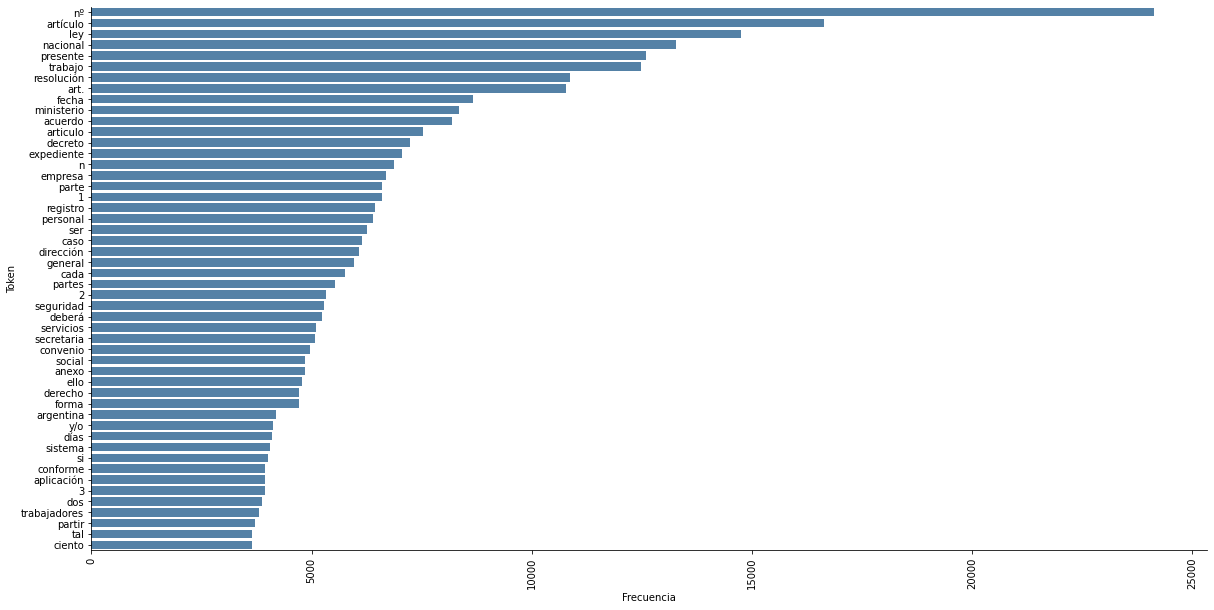

In [ ]:
plt.figure(figsize=(20,10))
seaborn.barplot(y=df_tokens_04[:50].Token, x=df_tokens_04[:50].Frecuencia, color='steelblue')
plt.title('Frecuencia de ocurrrencia de\n algunas palabras del corpus')
plt.xticks(rotation=90)
seaborn.despine()

Observamos lo siguiente: nro., n° y n.° se refieren a la palabra número. De igual modo art., articulo y artículo.

#### Paso 5: Steeming y Lematización con NLTK y SpaCY

##### **Stemming**
El stemming consiste en extreaer la raíz o stem (tronco en inglés) de una palabra . Este proceso se realiza porque la raíz de una palabra puede aparecer más veces en un texto.

NLTK posee varios algoritmos para este proceso:
* Algoritmo de Porter: es un algoritmo de derivación de palabras y consiste en eliminar las terminaciones morfológicas e inflexionales comunes de las palabras en inglés, aunque es posible usarlo también en español. Es un proceso de normalización de términos muy usado en la clasificación automática de textos o en sistemas de recuperación de información. 
* Algoritmo de Porter2 o (Snowball): este algoritmo es mejor si se usan textos en español. Añade una serie de reglas que dependen del lenguaje que se utilice. 
* Algoritmo de Lancaster: 

Cómo trabajamos con un corpus en español utilizaremos la librería SnowballStemmer dentro de NLTK:

* http://josearcosaneas.github.io/python/r/procesamiento/lenguaje/2017/01/02/procesamiento-lenguaje-natural-0.html

* https://snowballstem.org/algorithms/spanish/stemmer.html


##### **Lematización**
La lematización es un proceso lingüístico que consiste en, dada una forma flexionada (es decir, en plural, en femenino, conjugada, etc), hallar el lema correspondiente. 

El lema es la forma que por convenio se acepta como representante de todas las formas flexionadas de una misma palabra. Es decir, el lema de una palabra es la palabra que nos encontraríamos como entrada en un diccionario tradicional: singular para sustantivos, masculino singular para adjetivos, infinitivo para verbos.

Por ejemplo, sabemos que canto, cantas, canta, cantamos, cantáis, cantan son distintas formas (conjugaciones) de un mismo verbo (cantar).

Los motores de búsqueda utilizan esta técnica al indexar páginas, puesto que muchas personas escriben versiones diferentes para la misma palabra y todas derivan de la palabra raíz.

Comparamos los dos procesos utilizando las 2 libreriás

##### Utilizando la librería NLTK

In [ ]:
from nltk.stem import SnowballStemmer

In [ ]:
Snowball_stemmer = SnowballStemmer('spanish')
tokens_05a_NLTK = [Snowball_stemmer.stem(word) for word in tokens_04]
print("Lista de tokens despúes del proceso de Stemming : ", tokens_05a_NLTK[:20])
print("\nTotal de tokens despúes del proceso de Stemming : ", len(tokens_05a_NLTK)) 

Lista de tokens despúes del proceso de Stemming :  ['0', '0', 'servici', 'nacional', 'sanid', 'calid', 'agroalimentari', 'sanid', 'vegetal', 'resolu', 'ampli', 'alcanc', 'articul', '1º', 'resolu', 'nº', 'autoriz', 'emision', 'autoriz', 'fitosanitari']

Total de tokens despúes del proceso de Stemming :  2504083


In [ ]:
dic_tokens_05a_NLTK = collections.Counter(tokens_05a_NLTK)
df_tokens_05a_NLTK = pandas.DataFrame(dic_tokens_05a_NLTK.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)

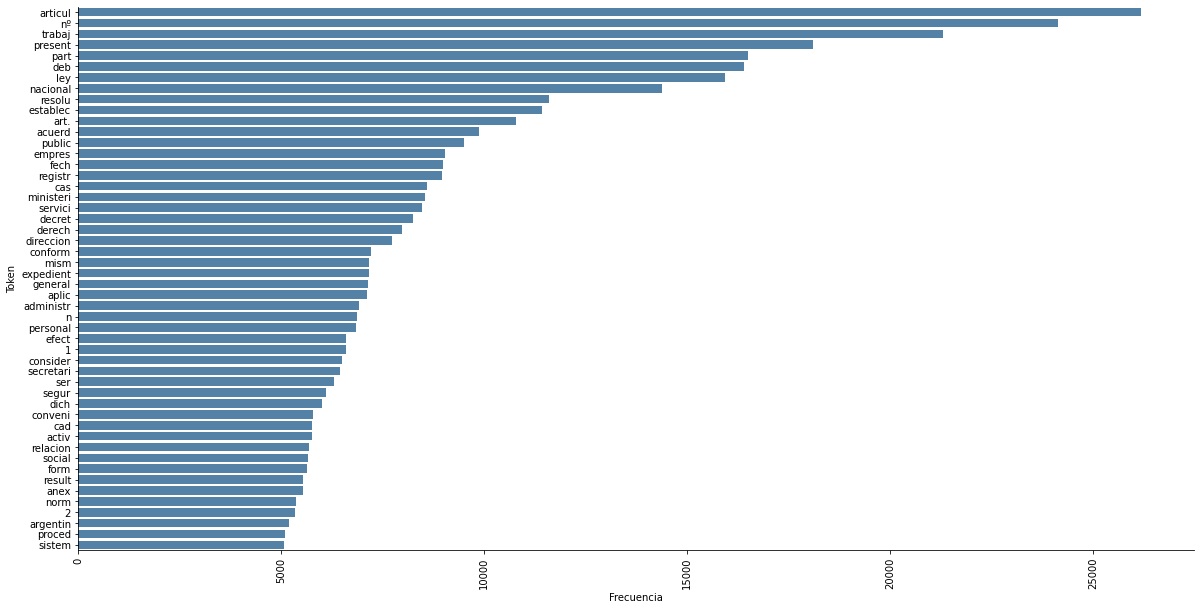

In [ ]:
plt.figure(figsize=(20,10))
seaborn.barplot(y=df_tokens_05a_NLTK[:50].Token, x=df_tokens_05a_NLTK[:50].Frecuencia, color='steelblue')
plt.title('Frecuencia de ocurrrencia \n Después del proceso de Stemming (NLTK)')
plt.xticks(rotation=90)
seaborn.despine()

El **lemmatizador**	busca	un	lema	para	la	palabra,	y	la	devuelve	tal	cual si	no	lo	halla.

Si	se	quieren	encontrar	los	verbos,	hay	que	especificarlo. Reconoce	adjetivos	(pos=‘a’),	sustantivos	(pos=‘n’),	adverbios (pos=‘r’)	y	verbos	(pos=‘v’)	

In [ ]:
# Usamos la librería wordnet para obter la forma lemmatizada
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lemmatizer = WordNetLemmatizer()
tokens_05b_NLTK = [lemmatizer.lemmatize(word) for word in tokens_04 ]
print("Lista de tokens despúes del proceso de Lemmatización: ", tokens_05b_NLTK[:20])
print("\nTotal de tokens despúes del proceso de Lemmatización: ", len(tokens_05b_NLTK))

Lista de tokens despúes del proceso de Lemmatización:  ['0', '0', 'servicio', 'nacional', 'sanidad', 'calidad', 'agroalimentaria', 'sanidad', 'vegetal', 'resolución', 'amplíase', 'alcance', 'artículo', '1º', 'resolución', 'nº', 'autorizando', 'emisión', 'autorizaciones', 'fitosanitarias']

Total de tokens despúes del proceso de Lemmatización:  2504083


In [ ]:
dic_tokens_05b_NLTK = collections.Counter(tokens_05b_NLTK)
df_tokens_05b_NLTK = pandas.DataFrame(dic_tokens_05b_NLTK.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)

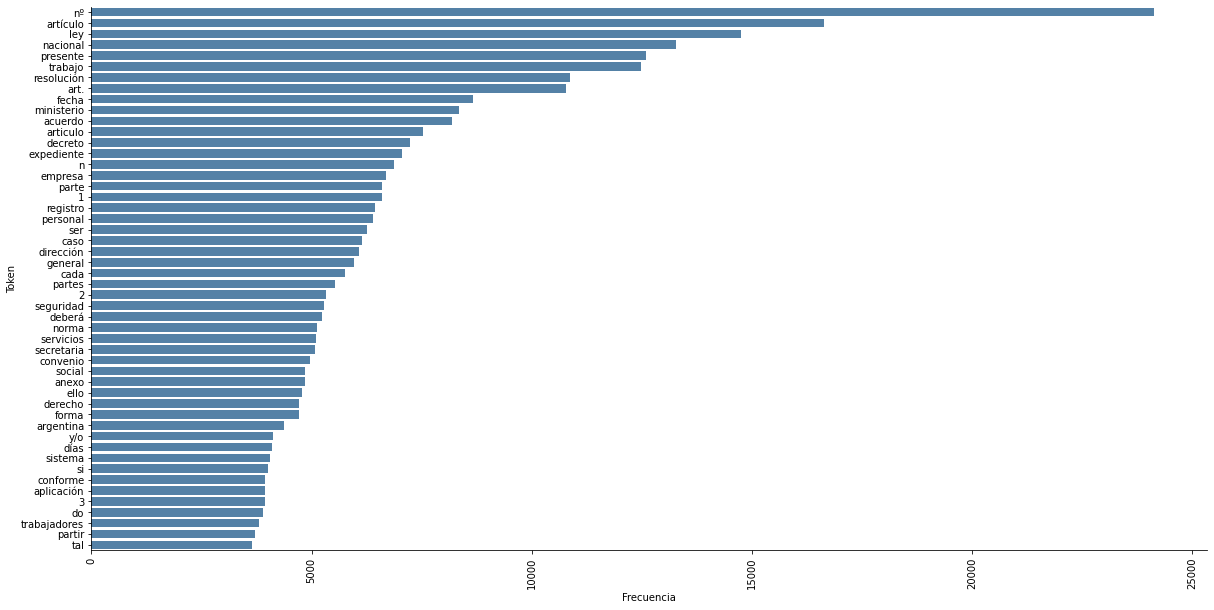

In [ ]:
plt.figure(figsize=(20,10))
seaborn.barplot(y=df_tokens_05b_NLTK[:50].Token, x=df_tokens_05b_NLTK[:50].Frecuencia, color='steelblue')
plt.title('Frecuencia de ocurrrencia \n Después del proceso de Lemmatización (NLTK)')
plt.xticks(rotation=90)
seaborn.despine()

Comparamos los tokens entre raw, stemming and lemmatization.

Observamos que luego de aplicar los procesos de stemmed y lematización se modifica la frecuencia de distribución, aunque las más frecuentes siguien siendo los mismos tokens, variando un poco el orden.

Mostramos algunos ejemplos con distintas modificaciones:

In [ ]:
print( "Raw : ", tokens_04[10],"\tStemmed NLTK: ", tokens_05a_NLTK[10], "\t\tLemmatized NLTK : ", tokens_05b_NLTK[10])
print( "Raw : ", tokens_04[12],"\tStemmed NLTK: ", tokens_05a_NLTK[12], "\t\tLemmatized NLTK : ", tokens_05b_NLTK[12])
print( "Raw : ", tokens_04[1187],"\tStemmed NLTK: ", tokens_05a_NLTK[1187], "\t\tLemmatized NLTK : ", tokens_05b_NLTK[1187])
print( "Raw : ", tokens_04[22],"\t\tStemmed NLTK: ", tokens_05a_NLTK[22], "\t\tLemmatized NLTK : ", tokens_05b_NLTK[22])
print( "Raw : ", tokens_04[23],"\t\tStemmed NLTK: ", tokens_05a_NLTK[23], "\t\tLemmatized NLTK : ", tokens_05b_NLTK[23])
print( "Raw : ", tokens_04[314],"\t\tStemmed NLTK: ", tokens_05a_NLTK[314], "\t\tLemmatized NLTK : ", tokens_05b_NLTK[314])

Raw :  amplíase 	Stemmed NLTK:  ampli 		Lemmatized NLTK :  amplíase
Raw :  artículo 	Stemmed NLTK:  articul 		Lemmatized NLTK :  artículo
Raw :  articulo 	Stemmed NLTK:  articul 		Lemmatized NLTK :  artículo
Raw :  frutos 		Stemmed NLTK:  frut 		Lemmatized NLTK :  frutos
Raw :  frescos 		Stemmed NLTK:  fresc 		Lemmatized NLTK :  fresco
Raw :  art. 		Stemmed NLTK:  art. 		Lemmatized NLTK :  artículo


##### Utilizando la librería SpaCy

Solo tiene lematización. Al ser un proceso lento, más de 1 hora, limitamos solo los primeros 100 tokens.

In [ ]:
import es_core_news_sm
core_datos_spanish = es_core_news_sm.load()

In [ ]:
tokens_05b_Spacy = []

for token in tokens_04[:100]:
    palabra = core_datos_spanish(token)
    tokens_05b_Spacy.append(palabra[0].lemma_)

print("Lista de tokens despúes del proceso de Lemmatization: ", tokens_05b_Spacy[:20])

Lista de tokens despúes del proceso de Lemmatization:  ['0', '0', 'servicio', 'nacional', 'sanidad', 'calidad', 'agroalimentario', 'sanidad', 'vegetal', 'resolución', 'amplíase', 'alcanzar', 'artículo', '1º', 'resolución', 'número', 'autorizar', 'emisión', 'autorización', 'fitosanitario']


In [ ]:
print( "Raw : ", tokens_04[10],"\tStemmed NLTK: ", tokens_05a_NLTK[10], "\t\tLemmatized NLTK : ", tokens_05b_NLTK[10], "\tLemmatized Spacy : ", tokens_05b_Spacy[10])
print( "Raw : ", tokens_04[12],"\tStemmed NLTK: ", tokens_05a_NLTK[12], "\t\tLemmatized NLTK : ", tokens_05b_NLTK[12], "\tLemmatized Spacy : ", tokens_05b_Spacy[12])
print( "Raw : ", tokens_04[22],"\t\tStemmed NLTK: ", tokens_05a_NLTK[22], "\t\tLemmatized NLTK : ", tokens_05b_NLTK[22], "\tLemmatized Spacy : ", tokens_05b_Spacy[22])
print( "Raw : ", tokens_04[23],"\t\tStemmed NLTK: ", tokens_05a_NLTK[23], "\t\tLemmatized NLTK : ", tokens_05b_NLTK[23], "\tLemmatized Spacy : ", tokens_05b_Spacy[23])
print( "Raw : ", tokens_04[32],"\tStemmed NLTK: ", tokens_05a_NLTK[32], "\tLemmatized NLTK : ", tokens_05b_NLTK[32], "\tLemmatized Spacy : ", tokens_05b_Spacy[32])
print( "Raw : ", tokens_04[35],"\t\tStemmed NLTK: ", tokens_05a_NLTK[35], "\t\tLemmatized NLTK : ", tokens_05b_NLTK[35], "\t\tLemmatized Spacy : ", tokens_05b_Spacy[35])

Raw :  amplíase 	Stemmed NLTK:  ampli 		Lemmatized NLTK :  amplíase 	Lemmatized Spacy :  amplíase
Raw :  artículo 	Stemmed NLTK:  articul 		Lemmatized NLTK :  artículo 	Lemmatized Spacy :  artículo
Raw :  frutos 		Stemmed NLTK:  frut 		Lemmatized NLTK :  frutos 	Lemmatized Spacy :  fruto
Raw :  frescos 		Stemmed NLTK:  fresc 		Lemmatized NLTK :  fresco 	Lemmatized Spacy :  fresco
Raw :  expediente 	Stemmed NLTK:  expedient 	Lemmatized NLTK :  expediente 	Lemmatized Spacy :  expedientar
Raw :  nº 		Stemmed NLTK:  nº 		Lemmatized NLTK :  nro 		Lemmatized Spacy :  número


Observamos una diferencia en la lematización.

* El token **frutos**, la librería NLTK mantiene el plural y SpaCy si lo transforma a singular.
* El token **expendiente**, la librería NLTK mantiene el singular y SpaCy modifica el término.
* El token **nº**, la librería NLTK lo transforma nro y SpaCy lo transforma a número.


El **stemming** es **mucho más rápido** desde el punto de vista del procesamiento que la **lematización**. También tiene como ventaja que reconoce relaciones entre palabras de distinta clase. Podría reconocer, por ejemplo, que picante y picar tienen como raíz pic-. En otras palabras, el stemming puede reducir el número de elementos que forman nuestros textos. Y eso, en muchos casos, es lo que buscamos.

Una **desventaja del stemming** es que sus **algoritmos son más simples que** los de **lematización**:
* *overstemming*: Pueden “recortar” demasiado la raíz y encontrar relaciones entre palabras que realmente no existen. 
* *understemming*: También puede suceder que deje raíces demasiado extensas o específicas, y que tengamos más bien un déficit de raíces, en cuyo caso palabras que deberían convertirse en una misma raíz no lo hacen. 

No hay mucho que hacer con eso, pero el stemming es una muy buena solución de compromiso en la mayoría de los casos.

El **stemming** suele ser una buena solución cuando no importa demasiado la precisión y se requiere de un procesamiento eficiente. 

La **lematización** suele funcionar mejor cuando se necesita procesar palabras de manera similar a como lo hace un ser humano.


#### Paso 6: Eliminar las palabras con frecuencia menor a n

Podríamos eliminar las palabras que tienen una frecuencia menor a 100 porque son las que menos peso tienen en el texto. 
NO estamos todos deacuerdo en este punto, por lo que solamente graficamos las palabras con frecuencia mayor a 100.

A partir de este punto trabajamos con la lista de tokens lematizado por NLTK.

#### Paso 7: Sustituir palabras con demasiada variabilidad (p.ej. números) con un placeholder (p.ej. DÍGITO)

Encontramos por ejemplo el siguiente caso: nro., n° y n.° se refieren a la palabra número.


In [ ]:
dic_Igualdades = {'nro.':'nro', 'n°':'nro', 'n.°':'nro', 'nº':'nro', 'n.º':'nro', 'n.':'nro', 'art.':'artículo', 'articulo':'artículo'}

In [ ]:
tokens_07 = tokens_05b_NLTK 
for i in range(len(tokens_07)):    
    for key in dic_Igualdades:
        if tokens_07[i] == key:
            tokens_07[i] = dic_Igualdades[key]
            
print("Lista de tokens despúes del proceso de sustitución de tokens similares: ", tokens_07[:20])
print("\nTotal de tokens despúes del proceso de sustitución de tokens similares: ", len(tokens_07))

Lista de tokens despúes del proceso de sustitución de tokens similares:  ['0', '0', 'servicio', 'nacional', 'sanidad', 'calidad', 'agroalimentaria', 'sanidad', 'vegetal', 'resolución', 'amplíase', 'alcance', 'artículo', '1º', 'resolución', 'nro', 'autorizando', 'emisión', 'autorizaciones', 'fitosanitarias']

Total de tokens despúes del proceso de sustitución de tokens similares:  2504083


In [ ]:
dic_tokens_07 = collections.Counter(tokens_07)
df_tokens_07 = pandas.DataFrame(dic_tokens_07.items(), columns=['Token', 'Frecuencia']).sort_values(by="Frecuencia", ascending=False)

TypeError: ignored

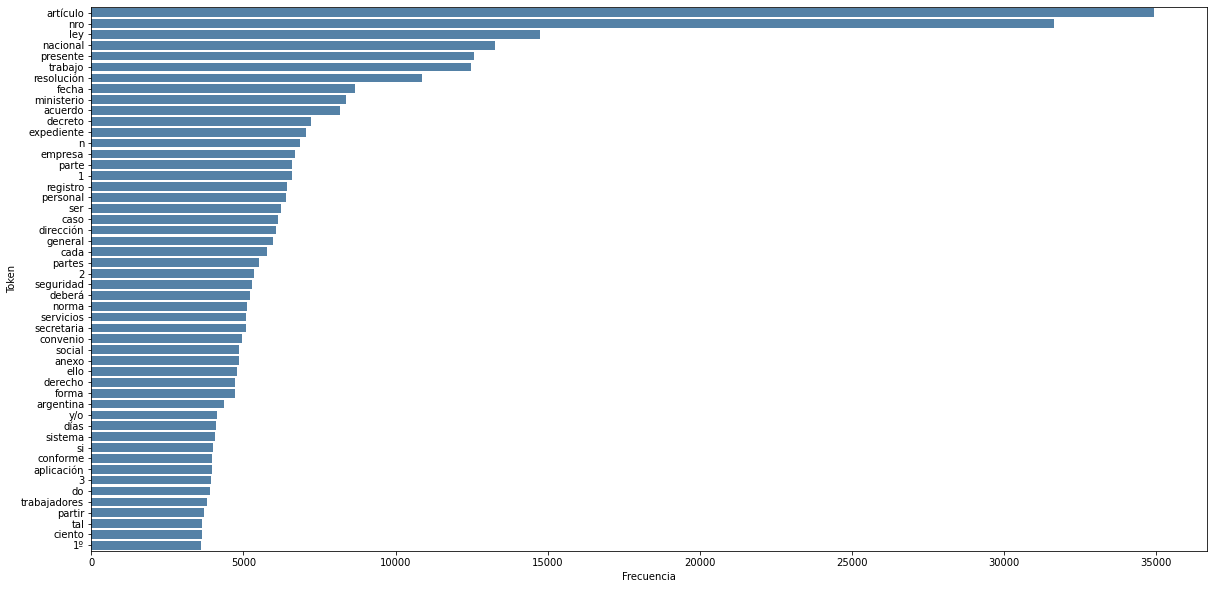

In [ ]:
plt.figure(figsize=(20,10))
seaborn.barplot(y=df_tokens_07[:50].Token, x=df_tokens_07[:50].Frecuencia, color='steelblue')
plt.title('Frecuencia de ocurrrencia de\n Después del proceso de sustitución de tokens similares')
plt.xticks(rotation=90)
seaborn.despine()

### Información Mutua

Generamos un DataFrame con los bigrama.

In [ ]:
dic_tokens_07_lemmatized = collections.Counter(tokens_07)
tokens_cant_lemmatized = len(tokens_07)

In [ ]:
bigramas_lemmatized = []
for c in range(tokens_cant_lemmatized - 1):
    tupla = tokens_07[c], tokens_07[c+1]
    bigramas_lemmatized.append(tupla)

bigramas_lemmatized[:10]

[('0', '0'),
 ('0', 'servicio'),
 ('servicio', 'nacional'),
 ('nacional', 'sanidad'),
 ('sanidad', 'calidad'),
 ('calidad', 'agroalimentaria'),
 ('agroalimentaria', 'sanidad'),
 ('sanidad', 'vegetal'),
 ('vegetal', 'resolución'),
 ('resolución', 'amplíase')]

In [ ]:
dic_bigramas_lemmatized = collections.Counter(bigramas_lemmatized)

df_bigramas_lemmatized = pandas.DataFrame(dic_bigramas_lemmatized.items(), columns=["Bigrama", "Frecuencia"]).sort_values(by="Frecuencia", ascending=False)
df_bigramas_lemmatized[:10]

,Bigrama,Frecuencia
952,"(ley, nro)",7464
32,"(expediente, nro)",5472
202,"(decreto, nro)",3889
130,"(dirección, nacional)",3254
1049,"(seguridad, social)",2998
12,"(artículo, 1º)",2477
38,"(ministerio, economia)",2407
2372,"(ministerio, trabajo)",2367
1547,"(buenos, aire)",2334
14,"(resolución, nro)",2325


Graficamos el Histograma de Frecuencia de Bigramas, la cual también sigue una distribución exponencial según ley de Zipf.

TypeError: ignored

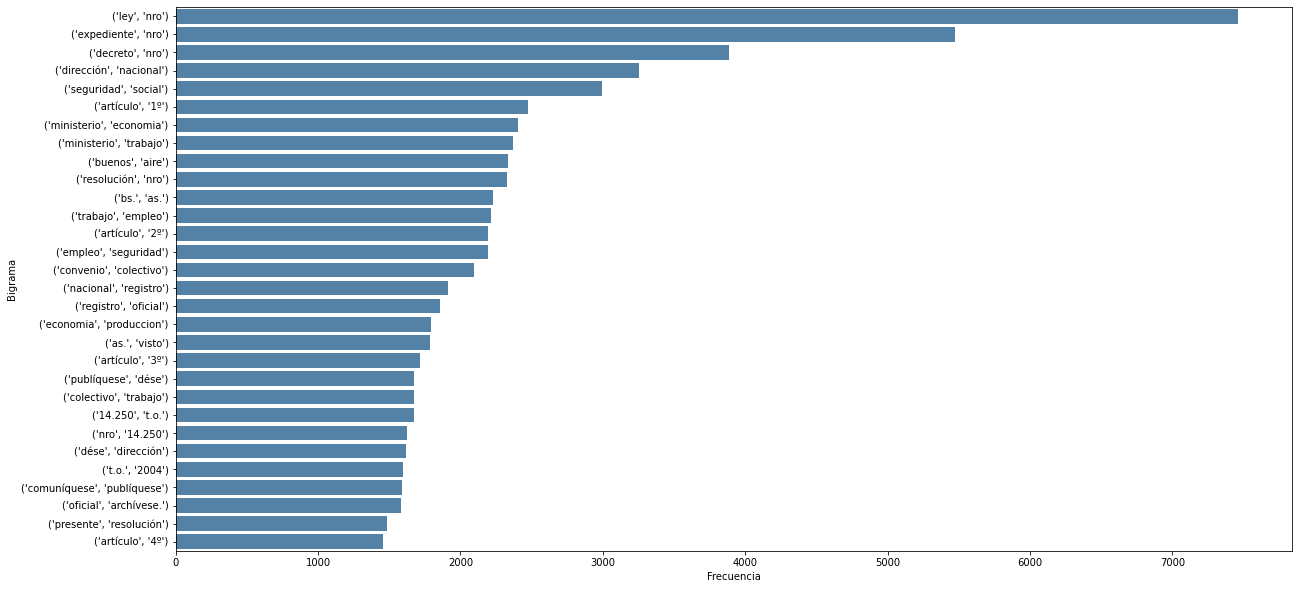

In [ ]:
plt.figure(figsize=(20,10))
seaborn.barplot(y=df_bigramas_lemmatized[:30].Bigrama, x=df_bigramas_lemmatized[:30].Frecuencia, color='steelblue')
plt.title('Frecuencia de ocurrrencia de\n de bigramas')
plt.xticks(rotation=90)
seaborn.despine()

Armamos la siguiente tabla:

| Palabra 1 | Palabra 2 | Frecuencia Palabra 1 | Frecuencia Palabra 2 | Frecuencia Co-ocurrentes | PMI |
| --- | --- | --- | --- | ---| --- |
| --- | --- | --- | --- | ---| --- |

In [ ]:
lista_lemmatized = []
for clave, valor in dic_bigramas_lemmatized.items():
    prob1 = dic_tokens_07_lemmatized[clave[0]] / tokens_cant_lemmatized
    prob2 = dic_tokens_07_lemmatized[clave[1]] / tokens_cant_lemmatized
    probCoOcu = valor / tokens_cant_lemmatized
    imp = numpy.log((valor / tokens_cant_lemmatized) / ((dic_tokens_07_lemmatized[clave[0]] / tokens_cant_lemmatized) * (dic_tokens_07_lemmatized[clave[1]] / tokens_cant_lemmatized)))
    item = clave[0], clave[1], dic_tokens_07_lemmatized[clave[0]], dic_tokens_07_lemmatized[clave[1]], valor, prob1, prob2, probCoOcu, imp
    lista_lemmatized.append(item)

In [ ]:
df_imp_lemmatized = pandas.DataFrame(lista_lemmatized, columns=["Palabra1", "Palabra2", "FrecuenciaPalabra1", "FrecuenciaPalabra2", "FrecuenciaCoOcurrencia", "Prob1", "Prob2", "ProbCoOcu", "IMP"])
df_imp_lemmatized.sort_values(by="IMP", ascending=False)

,Palabra1,Palabra2,FrecuenciaPalabra1,FrecuenciaPalabra2,FrecuenciaCoOcurrencia,Prob1,Prob2,ProbCoOcu,IMP
92961,costurera,marcadora,1,1,1,3.993478e-07,3.993478e-07,3.993478e-07,14.733433
752726,705-comfer/00,858-comfer/90,1,1,1,3.993478e-07,3.993478e-07,3.993478e-07,14.733433
757610,09/vi/05,2492,1,1,1,3.993478e-07,3.993478e-07,3.993478e-07,14.733433
459275,picacarne,freidoras,1,1,1,3.993478e-07,3.993478e-07,3.993478e-07,14.733433
378265,desazufrada,defluorurada,1,1,1,3.993478e-07,3.993478e-07,3.993478e-07,14.733433
...,...,...,...,...,...,...,...,...,...
873051,artículo,expediente,34936,7050,1,1.395161e-02,2.815402e-03,3.993478e-07,-4.588623
398486,ministerio,artículo,8360,34936,1,3.338547e-03,1.395161e-02,3.993478e-07,-4.759054
31210,artículo,resolución,34936,10867,1,1.395161e-02,4.339712e-03,3.993478e-07,-5.021326
507365,nro,trabajo,31628,12483,1,1.263057e-02,4.985058e-03,3.993478e-07,-5.060488


Observamos que los que tienen IMP de 14 tienen una Frecuencia de co-ocurrrencia de 1, por lo que filtramos los que tienen mas de 100 co-ocurrencias, para obtener datos mas significativos.

In [ ]:
df_imp_lemmatized_filtrado = df_imp_lemmatized[df_imp_lemmatized.FrecuenciaCoOcurrencia > 100].sort_values(by="IMP", ascending=False)
df_imp_lemmatized_filtrado

,Palabra1,Palabra2,FrecuenciaPalabra1,FrecuenciaPalabra2,FrecuenciaCoOcurrencia,Prob1,Prob2,ProbCoOcu,IMP
795045,secretario/a,t.s.j.,122,126,116,0.000049,0.000050,0.000046,9.846720
759056,aida,lucia,144,146,144,0.000058,0.000058,0.000058,9.749827
4461,suipacha,767,148,135,133,0.000059,0.000054,0.000053,9.721295
567589,ob.,cit.,127,153,127,0.000051,0.000061,0.000051,9.702995
833808,portal,belén,135,129,110,0.000054,0.000052,0.000044,9.668826
...,...,...,...,...,...,...,...,...,...
23071,trabajo,artículo,12483,34936,133,0.004985,0.013952,0.000053,-0.269614
909,nacional,nro,13277,31628,125,0.005302,0.012631,0.000050,-0.293840
732,ley,artículo,14758,34936,125,0.005894,0.013952,0.000050,-0.499067
37673,nro,nro,31628,31628,129,0.012631,0.012631,0.000052,-1.130351


Los pares de palabras que son buenos candidatos para ser considerados como colocaciones obtienen valores altos de IMP porque la probabilidad de co-ocurrencia es solamente un poco menor que las probabilidades de ocurrencia de cada una de las palabras. Contrariamente, los pares de palabras cuyas probabilidades de ocurrencia son considerablemente mayores que su probabilidad de co-ocurrencia obtienen valores pequeños de IMP.

Graficamos la relación entre tokens de los bigramas con frecuencia de co-ocurrencia mayor a 100 y con un IMP mayor a 6.

In [ ]:
df_tmp = df_imp_lemmatized_filtrado[df_imp_lemmatized_filtrado.IMP > 6]

TypeError: ignored

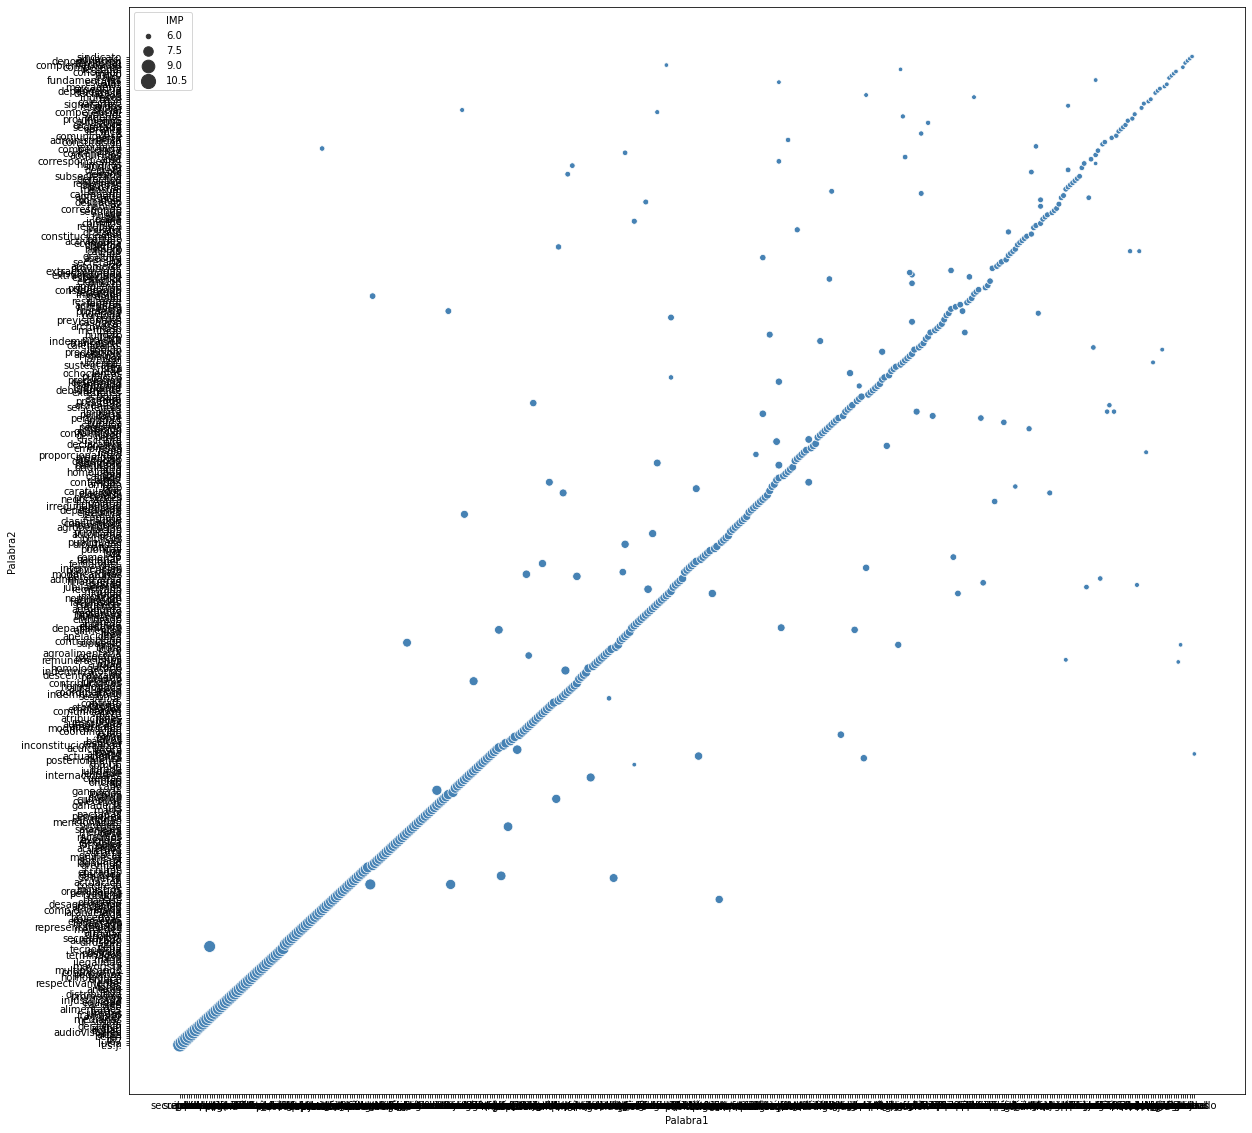

In [ ]:
plt.figure(figsize=(20,20))
seaborn.scatterplot(x=df_tmp.Palabra1, y=df_tmp.Palabra2, size=df_tmp.IMP, color='steelblue', sizes=(20, 200))
plt.title('Relación entre tokens de los bigramas\n Frecuencia de co-ocurrencia > 100 e IMP > 6')
plt.xticks(rotation=90)
seaborn.despine()

# Pendiente

## Explorar el impacto de diferentes normalizaciones en la frecuencia de palabras, en la IM para detectar secuencias de palabras valiosas y en la IM con categorías gramaticales.



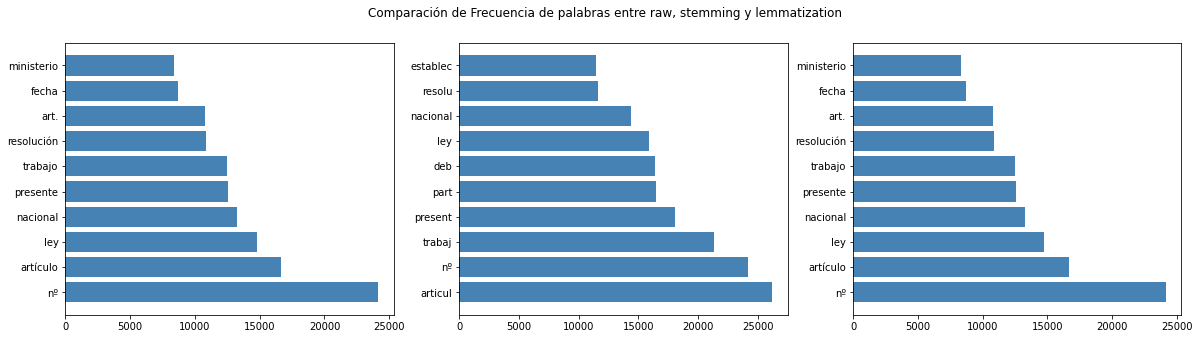

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

axes[0].barh(df_tokens_04[:10].Token, df_tokens_04[:10].Frecuencia, color='steelblue' )
axes[1].barh(df_tokens_05a_NLTK[:10].Token, df_tokens_05a_NLTK[:10].Frecuencia, color='steelblue')
axes[2].barh(df_tokens_05b_NLTK[:10].Token, df_tokens_05b_NLTK[:10].Frecuencia, color='steelblue')

fig.suptitle('Comparación de Frecuencia de palabras entre raw, stemming y lemmatization') 
plt.show() 

Observamos que luego de aplicar los procesos de stemmed y lematización se modifica la frecuencia de distribución, aunque las más frecuentes siguen siendo los mismos tokens, variando un poco el orden.

In [ ]:
# Armar el IMP a partir de tokens_05a_NLTK y tokens_05b_NLTK 
# Visualizar los primeros 20 de cada

In [ ]:
tokens_07_stemming = tokens_05a_NLTK 
for i in range(len(tokens_07_stemming)):    
    for key in dic_Igualdades:
        if tokens_07_stemming[i] == key:
            tokens_07_stemming[i] = dic_Igualdades[key]


In [ ]:
dic_tokens_07_stemming = collections.Counter(tokens_07_stemming)
tokens_cant_stemming = len(tokens_07_stemming)

In [ ]:
bigramas_stemming = []
for c in range(tokens_cant_stemming - 1):
    tupla = tokens_07_stemming[c], tokens_07_stemming[c+1]
    bigramas_stemming.append(tupla)

bigramas_stemming[:10]

[('0', '0'),
 ('0', 'servici'),
 ('servici', 'nacional'),
 ('nacional', 'sanid'),
 ('sanid', 'calid'),
 ('calid', 'agroalimentari'),
 ('agroalimentari', 'sanid'),
 ('sanid', 'vegetal'),
 ('vegetal', 'resolu'),
 ('resolu', 'ampli')]

In [ ]:
dic_bigramas_stemming = collections.Counter(bigramas_stemming)

In [ ]:
lista_stemming = []
for clave, valor in dic_bigramas_stemming.items():
    prob1 = dic_tokens_07_stemming[clave[0]] / tokens_cant_stemming
    prob2 = dic_tokens_07_stemming[clave[1]] / tokens_cant_stemming
    probCoOcu = valor / tokens_cant_stemming
    imp = numpy.log((valor / tokens_cant_stemming) / ((dic_tokens_07_stemming[clave[0]] / tokens_cant_stemming) * (dic_tokens_07_stemming[clave[1]] / tokens_cant_stemming)))
    item = clave[0], clave[1], dic_tokens_07_stemming[clave[0]], dic_tokens_07_stemming[clave[1]], valor, prob1, prob2, probCoOcu, imp
    lista_stemming.append(item)

In [ ]:
df_imp_stemming = pandas.DataFrame(lista_stemming, columns=["Palabra1", "Palabra2", "FrecuenciaPalabra1", "FrecuenciaPalabra2", "FrecuenciaCoOcurrencia", "Prob1", "Prob2", "ProbCoOcu", "IMP"])
df_imp_stemming.sort_values(by="IMP", ascending=False)

,Palabra1,Palabra2,FrecuenciaPalabra1,FrecuenciaPalabra2,FrecuenciaCoOcurrencia,Prob1,Prob2,ProbCoOcu,IMP
554097,postig,5.2.9.2.,1,1,1,3.993478e-07,3.993478e-07,3.993478e-07,14.733433
125048,reasonably,achiev,1,1,1,3.993478e-07,3.993478e-07,3.993478e-07,14.733433
421376,furosem,indapam,1,1,1,3.993478e-07,3.993478e-07,3.993478e-07,14.733433
421375,etacrin,furosem,1,1,1,3.993478e-07,3.993478e-07,3.993478e-07,14.733433
212797,8b,9b,1,1,1,3.993478e-07,3.993478e-07,3.993478e-07,14.733433
...,...,...,...,...,...,...,...,...,...
727288,articul,ministeri,26181,8554,1,1.045532e-02,3.416021e-03,3.993478e-07,-4.493510
414716,artículo,trabaj,10775,21314,1,4.302972e-03,8.511699e-03,3.993478e-07,-4.518670
119725,fech,articul,8980,26181,1,3.586143e-03,1.045532e-02,3.993478e-07,-4.542111
447371,deb,nacional,16393,14392,1,6.546508e-03,5.747413e-03,3.993478e-07,-4.545604


In [ ]:
df_imp_stemming_filtrado = df_imp_stemming[df_imp_stemming.FrecuenciaCoOcurrencia > 100].sort_values(by="IMP", ascending=False)
df_imp_stemming_filtrado[:20]

,Palabra1,Palabra2,FrecuenciaPalabra1,FrecuenciaPalabra2,FrecuenciaCoOcurrencia,Prob1,Prob2,ProbCoOcu,IMP
642189,secretario/,t.s.j.,122,126,116,0.000049,0.000050,0.000046,9.846720
4353,suipach,767,148,135,133,0.000059,0.000054,0.000053,9.721295
467323,ob.,cit.,127,153,127,0.000051,0.000061,0.000051,9.702995
673443,portal,belen,136,129,110,0.000054,0.000052,0.000044,9.661446
111329,cin,artes,138,146,123,0.000055,0.000058,0.000049,9.634757
1533,dolar,estadounidens,158,145,124,0.000063,0.000058,0.000050,9.514386
111330,artes,audiovisual,146,135,103,0.000058,0.000054,0.000041,9.479281
612766,cacer,bollati,201,187,187,0.000080,0.000075,0.000075,9.430128
612762,gerzicich,arabel,145,238,145,0.000058,0.000095,0.000058,9.261162
612748,aid,luci,248,150,144,0.000099,0.000060,0.000058,9.179182


Para comparar, muestro nuevamente el IMP con Lemmatización

In [ ]:
df_imp_lemmatized_filtrado[:20]

,Palabra1,Palabra2,FrecuenciaPalabra1,FrecuenciaPalabra2,FrecuenciaCoOcurrencia,Prob1,Prob2,ProbCoOcu,IMP
795045,secretario/a,t.s.j.,122,126,116,0.000049,0.000050,0.000046,9.846720
759056,aida,lucia,144,146,144,0.000058,0.000058,0.000058,9.749827
4461,suipacha,767,148,135,133,0.000059,0.000054,0.000053,9.721295
567589,ob.,cit.,127,153,127,0.000051,0.000061,0.000051,9.702995
833808,portal,belén,135,129,110,0.000054,0.000052,0.000044,9.668826
124131,cine,artes,137,146,123,0.000055,0.000058,0.000049,9.642030
124132,artes,audiovisuales,146,120,103,0.000058,0.000048,0.000041,9.597064
759074,caceres,bollati,127,187,127,0.000051,0.000075,0.000051,9.502325
759070,gerzicich,arabel,145,238,145,0.000058,0.000095,0.000058,9.261162
759069,blanc,gerzicich,240,145,145,0.000096,0.000058,0.000058,9.252794


Observamos que los resultados con parecidos.

# ¿Cómo podríamos hacer para integrar las secuencias de palabras con alta IMP en nuestro preproceso de los datos?




Cómo hago para armar de 2 palabras en uno. Esto es para evitar bigramas. Ver:
* nltk.tokenize.mwe module: https://www.nltk.org/api/nltk.tokenize.html?highlight=tokenize#module-nltk.tokenize 

Multi-Word Expression Tokenizer

A MWETokenizer takes a string which has already been divided into tokens and retokenizes it, merging multi-word expressions into single tokens, using a lexicon of MWEs:

# Representar las palabras como vectores, donde las dimensiones son… otras palabras? contextos? categorías?

OPCION 1

Representaremos a los documentos de manera vectorial usando bolsas de palabras:


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

Entrenamos para que el vectorizador asigne una columna a cada token posible:

In [ ]:
vect.fit(tokens_05b_NLTK)

In [ ]:
vect.get_feature_names()

Luego veremos cómo se vectorizan los datos de entrenamiento:

In [ ]:
X2 = vect.transform(tokens_05b_NLTK)
X2

In [ ]:
X2.todense()

In [ ]:
vect.vocabulary_

OPCION 2

In [34]:
#Represetnacion de palabras como vectores utilizando la librería gensim
from gensim.test.utils import common_texts, get_tmpfile #para ejemplos
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
import os
import pandas as pd

In [35]:
# funcion para preprocesar el texto e ir iterando de forma eficiente los textos
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname)):
                yield line.lower().split()
 
sentences = MySentences("/content/drive/My Drive/Infoleg/") # a memory-friendly iterator
model = Word2Vec(sentences,workers=6,iter=3,size=200,window=12,negative=5)

UnicodeDecodeError: ignored